# Feature Engineering

## Set Up

In [37]:
# Importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [38]:
df = pd.read_csv("Data/used_car_clean.csv", index_col=0)

In [39]:
df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Has_Service_History,Mileage,Car_Age,Engine_Bin
0,SKODA Fabia,6900,70189,2016,3,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,0,70189,7,Small (≤1.4L)
1,Vauxhall Corsa,1495,88585,2008,4,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,1,88585,15,Small (≤1.4L)
2,Hyundai i30,949,137000,2011,3,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,0,137000,12,Small (≤1.4L)
3,MINI Hatch,2395,96731,2010,5,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,1,96731,13,Small (≤1.4L)
4,Vauxhall Corsa,1000,85000,2013,3,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,0,85000,10,Small (≤1.4L)


## Depreciation Features

### Mileage Per Year

In [40]:
df['Mileage_per_Year'] = df['Mileage(miles)'] / df['Car_Age']


### Log Transformation

In the univariate analysis we observed the distribution was right skewed. So we will apply a logarithm to the price column.

In [41]:

df['Log_Price'] = np.log(df['Price'])
df['Log_Mileage'] = np.log(df['Mileage(miles)'])


### Age Bands 

To observe the depreciation we will create age bands

In [42]:
bins = [0, 3, 6, 10, 20]
labels = ['0-3', '3-6', '6-10', '10+']

df['Age_Band'] = pd.cut(df['Car_Age'], bins=bins, labels=labels)


### Premium Brand Indicator 

We will add a column to indicate premium brands.

In [43]:
df['title'].head(10)

0       SKODA Fabia
1    Vauxhall Corsa
2       Hyundai i30
3        MINI Hatch
4    Vauxhall Corsa
5     Hyundai Coupe
6        Ford Focus
7    Vauxhall Corsa
8       Peugeot 207
9       Ford Fiesta
Name: title, dtype: object

In [44]:
premium_brands = [
    'bmw',
    'audi',
    'mercedes',
    'mercedes-benz',
    'porsche',
    'jaguar',
    'land rover',
    'rangerover',
    'lexus'
]


In [45]:
df['title_lower'] = df['title'].str.lower()


In [46]:
df['Is_Premium'] = df['title_lower'].apply(
    lambda x: any(brand in x for brand in premium_brands)
).astype(int)


In [47]:
df[['title', 'Is_Premium']].head(20)


,title,Is_Premium
0,SKODA Fabia,0
1,Vauxhall Corsa,0
2,Hyundai i30,0
3,MINI Hatch,0
4,Vauxhall Corsa,0
5,Hyundai Coupe,0
6,Ford Focus,0
7,Vauxhall Corsa,0
8,Peugeot 207,0
9,Ford Fiesta,0


In [48]:
df['Is_Premium'].value_counts()


Is_Premium
0    2946
1     650
Name: count, dtype: int64

In [49]:
df.groupby('Is_Premium')['Price'].mean()


Is_Premium
0    5273.349627
1    8131.687692
Name: Price, dtype: float64

### Brand Feature 

To create the brand feature we must separate brand from the vehicle model.

In [50]:
# Splitting the brand

df['Brand'] = df['title'].str.split().str[0]


In [51]:
# Normalising the titles 

df['Brand'] = df['Brand'].str.strip().str.title()


In [52]:
# Verifying result 

df['Brand'].value_counts().head(20)


Brand
Vauxhall         546
Ford             408
Bmw              265
Volkswagen       262
Peugeot          245
Toyota           187
Renault          174
Mercedes-Benz    165
Nissan           147
Audi             145
Honda            104
Fiat             103
Mini              97
Hyundai           93
Citroen           93
Kia               81
Skoda             63
Seat              59
Mazda             51
Suzuki            41
Name: count, dtype: int64

Fixing edge cases

In [53]:
df['Brand'] = df['Brand'].replace({
    'Land': 'Land Rover',
    'Mercedes-Benz': 'Mercedes',
    'Mercedes': 'Mercedes'
})


### Observing Brand Cost 

In [54]:
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

print(brand_price.head(10))


Brand
Ds            14293.833333
Maserati      13300.000000
Abarth        11216.333333
Land Rover    10741.428571
Mg             9984.555556
Jaguar         8704.241379
Ssangyong      8636.000000
Infiniti       8625.714286
Bmw            8348.596226
Mercedes       7747.066667
Name: Price, dtype: float64


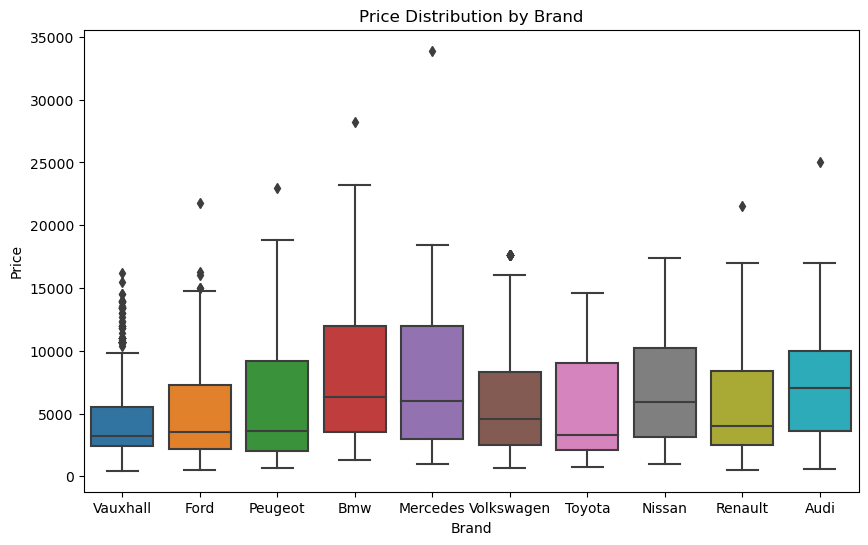

In [55]:
top_brands = df['Brand'].value_counts().head(10).index

plt.figure(figsize=(10,6))

sns.boxplot(
    data=df[df['Brand'].isin(top_brands)],
    x='Brand',
    y='Price'
)

plt.title("Price Distribution by Brand")
plt.show()


In [56]:

df.columns


Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Has_Service_History', 'Mileage',
       'Car_Age', 'Engine_Bin', 'Mileage_per_Year', 'Log_Price', 'Log_Mileage',
       'Age_Band', 'title_lower', 'Is_Premium', 'Brand'],
      dtype='object')

In [57]:
df[['title', 'Brand']].head(10)


,title,Brand
0,SKODA Fabia,Skoda
1,Vauxhall Corsa,Vauxhall
2,Hyundai i30,Hyundai
3,MINI Hatch,Mini
4,Vauxhall Corsa,Vauxhall
5,Hyundai Coupe,Hyundai
6,Ford Focus,Ford
7,Vauxhall Corsa,Vauxhall
8,Peugeot 207,Peugeot
9,Ford Fiesta,Ford


### Model Feature

Now we have brand we will also seperate model.

In [58]:

# Recreating Model column
df['Model'] = df['title'].str.split().str[1:].str.join(' ')


# Key Additional Features 

### Vehicle Usage Intensity

We will use vehicle usage intensity to add greater granularity to the mileage per year feature. We will divide by four levels of usage for modelling.

In [59]:
df["Usage_Level"] = pd.cut(
    df['Mileage_per_Year'],
    bins=[0, 5000, 12000, 20000,100000],
    labels=['Low', 'Normal', 'High', 'Very High']
)

### Expected Mileage vs Actual Mileage

A useful feature to evaluate under/over usage. UK average is 9000 miles a year so we multiply the car age by 9000 the minus this from the actual mileage.

In [60]:
df['Expected_Mileage'] = df['Car_Age'] * 9000
df['Mileage_Delta'] = df['Mileage(miles)'] - df['Expected_Mileage']

### Owners per Year

Exploring affect of ownership turnover on value.

In [61]:
df['Owners_per_Year'] = df['Previous Owners'] / df['Car_Age']


### Price per Seat

Captures vehicle segment differences.

In [62]:
df['Price_per_Seat'] = df['Price'] / df['Seats']


### Price per Year of Age 

Feature modelling depreciation patterns.

In [63]:
df['Price_per_Year_Age'] = df['Price'] / (df['Car_Age'] + 1)


# Vehicle Size/Practicality Features

### Door Category 

In [64]:
df['Door_Category'] = df['Doors'].map({
    2: 'Coupe',
    3: 'Small',
    4: 'Sedan',
    5: 'Family'
})

### Seats Category 

In [65]:
df['Is_Family_Car'] = (df['Seats'] >= 5).astype(int)


# Brand Positioning Features 

### Brand Average Price 

Captures brand positioning numerically 

In [66]:
brand_avg = df.groupby('Brand')['Price'].mean()

df['Brand_Avg_Price'] = df['Brand'].map(brand_avg)


### Model Average Price 

Predictive feature useful for modelling.

In [67]:
model_avg = df.groupby('Model')['Price'].mean()

df['Model_Avg_Price'] = df['Model'].map(model_avg)


# Engine-Related Features 

### Engine Per Seat Ratio

Useful proxy for performane orientation.

In [68]:
df['Engine_per_Seat'] = df['Engine'] / df['Seats']

# Age-Based Depreciation Features 

### Age Squared 

Captures nonlinear depreciation to observe the nonlinearity of vehicle depreciation.

In [69]:
df['Car_Age_Squared'] = df['Car_Age'] ** 2

# Service History Impact

### Service History + Age Interaction 

Observing car age and service history completeness and its relationships affect on value retention.

# Premium Interaction Feature 

### Premium Age Interaction

Observing if premium cars depreciate differently.

In [70]:
df['Premium_Age'] = df['Is_Premium'] * df['Car_Age']

In [71]:
df.to_csv('Data/feature_engineered_data.csv')

# Summary

After Feature engineering we now have **37 Unique Features**. This will give the model more variables with insight on depreciation and more granular information on car types. We will now prepare the data for modelling.